In [1]:
from googleapiclient.discovery import build
from datetime import datetime, timezone

In [2]:
import pandas as pd

In [3]:
df_videos = pd.read_csv('sahra_wagenknecht_videos.csv')

In [4]:
summary = df_videos.groupby("period").agg({
        "videoId": "count",
        "viewCount": "sum",
        "likeCount": "sum",
        "commentCount": "sum"
    }).rename(columns={"videoId": "numVideos"})

summary

,numVideos,viewCount,likeCount,commentCount
period,,,,
After Founding,279,35467062,2149188,365912
Before Founding,196,76616403,5138057,824084


In [71]:
df_Before = df_videos[df_videos['period'] == 'Before Founding']
df_Before

,videoId,publishedAt,period,viewCount,likeCount,commentCount
279,3rc4LRur7LA,2023-12-20 13:03:07+00:00,Before Founding,326695,17726,5509
280,A5AEU5wxDPo,2023-12-15 11:41:05+00:00,Before Founding,341932,21992,3763
281,b9PGwmmYgv4,2023-12-13 10:11:57+00:00,Before Founding,86633,6403,1734
282,qe5T8EXybf0,2023-11-30 19:34:42+00:00,Before Founding,260429,15651,3893
283,OIh05OgR-uk,2023-11-29 13:56:38+00:00,Before Founding,69488,7016,1951
...,...,...,...,...,...,...
470,RGhgywjoY7Q,2019-09-04 11:25:08+00:00,Before Founding,1188,93,3
471,GVUVHfp9apo,2019-09-04 10:28:42+00:00,Before Founding,3532,213,10
472,7kpqXdn3puQ,2019-09-04 10:14:40+00:00,Before Founding,10698,696,71
473,sD288bB83RI,2019-06-07 17:05:18+00:00,Before Founding,4344,246,11


In [100]:
df_After = df_videos[df_videos['period'] == 'After Founding']
df_After = df_After[df_After['commentCount'] >= 1]
df_After


,videoId,publishedAt,period,viewCount,likeCount,commentCount
0,eN3wrhLqZ4o,2025-09-14 07:14:36+00:00,After Founding,47586,4745,274
1,4gNdgJlro-w,2025-09-13 07:14:02+00:00,After Founding,21646,2206,141
2,iSZk3X-2BKI,2025-09-12 13:14:39+00:00,After Founding,25248,2515,137
3,I5wa38u48U4,2025-09-12 07:15:20+00:00,After Founding,40268,2857,176
4,F0sqnVTGv10,2025-09-11 17:18:36+00:00,After Founding,123860,8462,543
...,...,...,...,...,...,...
273,1VK0jX-64qo,2024-02-14 16:42:55+00:00,After Founding,174457,9362,2387
274,LkbVw4fanIg,2024-01-31 17:01:26+00:00,After Founding,215527,14484,3316
275,dzU5AoHMDu8,2024-01-27 20:14:49+00:00,After Founding,117287,8772,2833
276,ZfDr1wAzlsE,2024-01-27 20:09:42+00:00,After Founding,69511,4075,48


In [101]:


df_Before = df_videos[df_videos['period'] == 'Before Founding']
df_Before = df_Before[df_Before['commentCount'] >= 1]
df_After
df_Before

,videoId,publishedAt,period,viewCount,likeCount,commentCount
279,3rc4LRur7LA,2023-12-20 13:03:07+00:00,Before Founding,326695,17726,5509
280,A5AEU5wxDPo,2023-12-15 11:41:05+00:00,Before Founding,341932,21992,3763
281,b9PGwmmYgv4,2023-12-13 10:11:57+00:00,Before Founding,86633,6403,1734
282,qe5T8EXybf0,2023-11-30 19:34:42+00:00,Before Founding,260429,15651,3893
283,OIh05OgR-uk,2023-11-29 13:56:38+00:00,Before Founding,69488,7016,1951
...,...,...,...,...,...,...
470,RGhgywjoY7Q,2019-09-04 11:25:08+00:00,Before Founding,1188,93,3
471,GVUVHfp9apo,2019-09-04 10:28:42+00:00,Before Founding,3532,213,10
472,7kpqXdn3puQ,2019-09-04 10:14:40+00:00,Before Founding,10698,696,71
473,sD288bB83RI,2019-06-07 17:05:18+00:00,Before Founding,4344,246,11


In [102]:
df_After2 = df_After.set_index('publishedAt')
df_After2


,videoId,period,viewCount,likeCount,commentCount
publishedAt,,,,,
2025-09-14 07:14:36+00:00,eN3wrhLqZ4o,After Founding,47586,4745,274
2025-09-13 07:14:02+00:00,4gNdgJlro-w,After Founding,21646,2206,141
2025-09-12 13:14:39+00:00,iSZk3X-2BKI,After Founding,25248,2515,137
2025-09-12 07:15:20+00:00,I5wa38u48U4,After Founding,40268,2857,176
2025-09-11 17:18:36+00:00,F0sqnVTGv10,After Founding,123860,8462,543
...,...,...,...,...,...
2024-02-14 16:42:55+00:00,1VK0jX-64qo,After Founding,174457,9362,2387
2024-01-31 17:01:26+00:00,LkbVw4fanIg,After Founding,215527,14484,3316
2024-01-27 20:14:49+00:00,dzU5AoHMDu8,After Founding,117287,8772,2833


In [103]:

df_Before2 = df_Before.set_index('publishedAt')
df_Before2

,videoId,period,viewCount,likeCount,commentCount
publishedAt,,,,,
2023-12-20 13:03:07+00:00,3rc4LRur7LA,Before Founding,326695,17726,5509
2023-12-15 11:41:05+00:00,A5AEU5wxDPo,Before Founding,341932,21992,3763
2023-12-13 10:11:57+00:00,b9PGwmmYgv4,Before Founding,86633,6403,1734
2023-11-30 19:34:42+00:00,qe5T8EXybf0,Before Founding,260429,15651,3893
2023-11-29 13:56:38+00:00,OIh05OgR-uk,Before Founding,69488,7016,1951
...,...,...,...,...,...
2019-09-04 11:25:08+00:00,RGhgywjoY7Q,Before Founding,1188,93,3
2019-09-04 10:28:42+00:00,GVUVHfp9apo,Before Founding,3532,213,10
2019-09-04 10:14:40+00:00,7kpqXdn3puQ,Before Founding,10698,696,71


In [104]:
def normalize_to_relative(df, columns):
    """
    Convert the specified columns in a DataFrame to relative values
    (each value divided by the total of its column).

    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list): List of column names to normalize

    Returns:
        pd.DataFrame: DataFrame with normalized columns
    """
    df_relative = df.copy()
    for col in columns:
        total = df_relative[col].sum()
        df_relative[col] = df_relative[col] / total*1000
    return df_relative

# Example usage:
columns_to_normalize = ['likeCount', 'viewCount', 'commentCount']
df_After_relative = normalize_to_relative(df_After2, columns_to_normalize)

df_After_relative

,videoId,period,viewCount,likeCount,commentCount
publishedAt,,,,,
2025-09-14 07:14:36+00:00,eN3wrhLqZ4o,After Founding,1.346891,2.216770,0.748814
2025-09-13 07:14:02+00:00,4gNdgJlro-w,After Founding,0.612676,1.030599,0.385339
2025-09-12 13:14:39+00:00,iSZk3X-2BKI,After Founding,0.714628,1.174958,0.374407
2025-09-12 07:15:20+00:00,I5wa38u48U4,After Founding,1.139759,1.334734,0.480990
2025-09-11 17:18:36+00:00,F0sqnVTGv10,After Founding,3.505776,3.953278,1.483963
...,...,...,...,...,...
2024-02-14 16:42:55+00:00,1VK0jX-64qo,After Founding,4.937891,4.373740,6.523426
2024-01-31 17:01:26+00:00,LkbVw4fanIg,After Founding,6.100351,6.766637,9.062288
2024-01-27 20:14:49+00:00,dzU5AoHMDu8,After Founding,3.319732,4.098104,7.742299


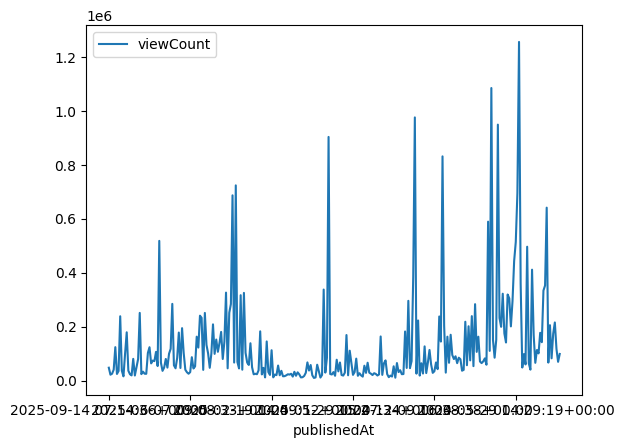

In [105]:
plot_Views = df_After2.plot(y =['viewCount'], kind= 'line')

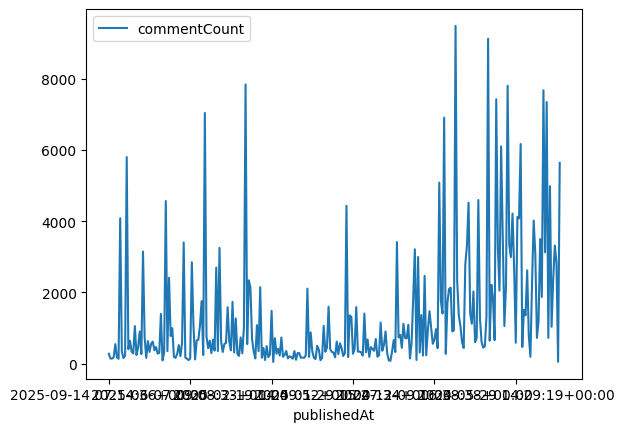

In [106]:
plot_comments = df_After2.plot(y =['commentCount'], kind= 'line')

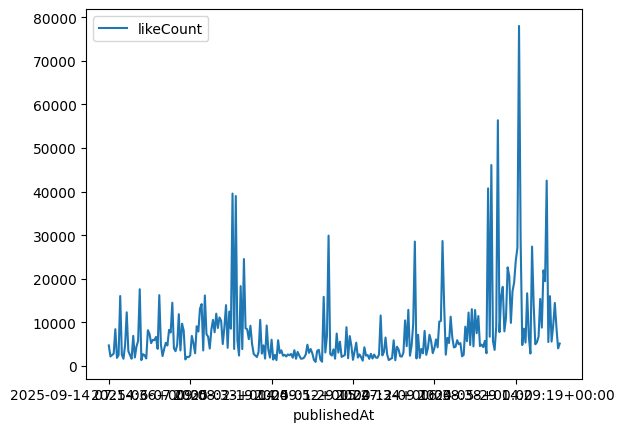

In [107]:
plot_Likes = df_After2.plot(y =['likeCount'], kind= 'line')

In [108]:
df_most_popular_After = df_After.sort_values(by='viewCount', ascending=False).head(100).reset_index(drop=True)
df_most_popular_After = df_most_popular_After.drop(columns='period')


In [109]:

df_most_popular_Before = df_Before.sort_values(by='viewCount', ascending=False).head(100).reset_index(drop=True)
df_most_popular_Before = df_most_popular_Before.drop(columns='period')

In [110]:
df_most_popular_After

,videoId,publishedAt,viewCount,likeCount,commentCount
0,qh8xUmT2NyI,2024-05-24 07:23:40+00:00,1256939,78014,4076
1,hhRZvfeXo-E,2024-08-24 16:10:33+00:00,1085789,46111,2212
2,Qn-e6dIGpBY,2024-12-27 10:05:54+00:00,976707,28555,3209
3,v3YPYiLNE9c,2024-07-05 18:58:29+00:00,949890,56380,3266
4,X3vdNP4Mjtg,2025-02-06 17:02:37+00:00,904243,29923,1596
...,...,...,...,...,...
95,Lm22LSzCSNk,2025-05-20 15:19:48+00:00,100612,6749,430
96,DSOa-JviyBQ,2025-09-08 07:18:22+00:00,100533,4810,218
97,sQ6dI3tOgyQ,2025-05-16 16:23:03+00:00,99942,8359,292
98,Po560dE89XE,2025-06-26 16:28:56+00:00,99449,8300,2408


In [111]:
df_most_popular_Before

,videoId,publishedAt,viewCount,likeCount,commentCount
0,WCwx94TOGPQ,2022-02-03 19:01:01+00:00,1982480,97705,19522
1,CAC9F3_pjjE,2021-12-02 19:53:57+00:00,1961058,131862,15154
2,bQNsHivR9AU,2022-10-20 18:44:19+00:00,1861729,128593,21187
3,5BZKoICJbZY,2023-03-18 13:20:07+00:00,1767578,108370,5130
4,5Uqxb8n0rdU,2023-01-28 15:01:05+00:00,1683366,81562,4623
...,...,...,...,...,...
95,t7_sLtCKULE,2020-05-28 16:06:45+00:00,272148,13613,2008
96,I5Qd6xiU55k,2021-03-25 15:30:01+00:00,271867,20446,4135
97,MrsMs5fM1Rg,2020-01-15 14:42:09+00:00,269529,9837,987
98,JaE6UMk1u6I,2022-01-23 11:27:00+00:00,266196,25302,2399


In [112]:
df_most_popular_Before.to_csv('MostPopularVideosB.csv')

In [113]:
df_most_popular_After.to_csv('MostPopularVideosA.csv')